In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
import plotly
plotly.tools.set_credentials_file(username='....', api_key='......')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode()

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go

## Data Preprocessing
First off, I will conduct a EDA to take a first look at the data and then do preprocessing

### Loading Data

In [4]:
df = open('......Credit Fraud Detection/creditcard.csv')
df = pd.read_csv(df)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.columns[df.isnull().any()].tolist() 
# there is no missing values in columns

[]

### Amount column is NOT in line with other columns, and I will standardize it so that it is compatible with other columns

In [7]:
# drop the Time column.since it doesn't make sense in modeling.
df = df.drop(['Time'],axis=1) 

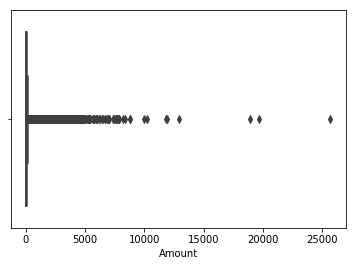

In [8]:
sns.boxplot(df.Amount);
# There are some outliers in the Amount column, however here I will leave them here 

In [9]:
df[df["Amount"] > 10000]
# none of these 7 records is claassified as "fraud".

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
46841,-23.712839,-42.172688,-13.320825,9.925019,-13.945538,5.564891,15.710644,-2.844253,-1.580725,-5.533256,...,7.921600,-6.320710,-11.310338,0.404175,-4.547278,-1.577118,-2.357385,2.253662,12910.93,0
54018,-21.780665,-38.305310,-12.122469,9.752791,-12.880794,4.256017,14.785051,-2.818253,-0.667338,-5.545590,...,7.437478,-5.619439,-10.547038,0.653249,-4.232409,-0.480459,-2.257913,2.082488,11898.09,0
58465,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,-8.423404,...,11.455313,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,19656.53,0
151296,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,-8.908182,...,11.502580,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,18910.00,0
169457,-20.924897,-37.943452,-14.060281,10.473005,-10.866639,6.256654,14.960521,-2.392155,-0.597076,-5.341249,...,6.829810,-6.926353,-9.928657,-0.447084,-4.848151,-2.241620,-2.140723,2.001492,11789.84,0
274771,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,-12.005487,...,-21.620120,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,25691.16,0
284249,-9.030538,-11.112584,-16.233798,3.592021,-40.427726,23.917837,44.054461,-7.277778,-4.210637,-7.776435,...,-0.269048,0.988144,7.040028,0.347693,2.520869,2.342495,3.478175,-2.713136,10199.44,0


### Ckeck the feature variables, target variable + skewness of Class

In [10]:
count_classes = pd.value_counts(df['Class'], sort = True).sort_index()
count_classes = pd.DataFrame(count_classes)
count_classes

,Class
0,284315
1,492


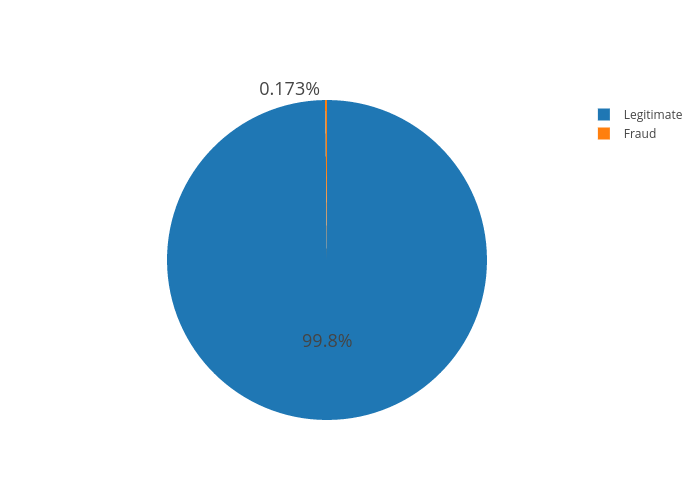

In [11]:
labels = ["Legitimate", "Fraud"]
values = count_classes["Class"].tolist()

trace = go.Pie(labels=labels, 
               values=values, 
               textfont=dict(size=18)
              )

py.image.ishow([trace])

It is obvious that this is an imbalanced dataset, the majority of which is 0 (normal transaction) and the minority is 1 (fraud transaction)<br>
Considering that imbalance issues can harm the predictability of traditional models. Therefore, I will resample the training dataset for better modelling.<br>
To make the dataset balanced, I have the following approaches:
1. oversampling
2. undersmapling
3. SMOTE
<br>Here, I want to cut down the majority class sample size to match the minority, ie. undersampling approach

### Before downsampling, I need to split the data into training and test sets

In [17]:
from sklearn.cross_validation import train_test_split
np.random.seed(37)
x = df.iloc[:, df.columns != 'Class']
y = df.iloc[:, df.columns == 'Class']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

#### After data split, I can downsample training data to get the dataset balanced  in terms of class (fraud vs. normal) (50-50 ratio)

In [13]:
count_fraud = len(y_train.ix[y_train.Class == 1, :])
count_normal = len(y_train.ix[y_train.Class == 0, :])
print count_fraud, count_normal # unbalanced training data

345 199019


In [14]:
normal_indices = y_train[y_train.Class == 0].index
fraud_indices = y_train[y_train.Class == 1].index

# randomly select "normal" records
np.random.seed(307)
random_normal_indices = np.random.choice(normal_indices, count_fraud, replace = False)
undersample_indices = np.concatenate([fraud_indices,random_normal_indices])

In [15]:
train_undersampled = df.iloc[undersample_indices]

In [28]:
feature_set_1 = pd.concat([train_undersampled.iloc[:, 0:15], train_undersampled["Class"]], axis=1)
feature_set_2 = train_undersampled.iloc[:, 15:31]

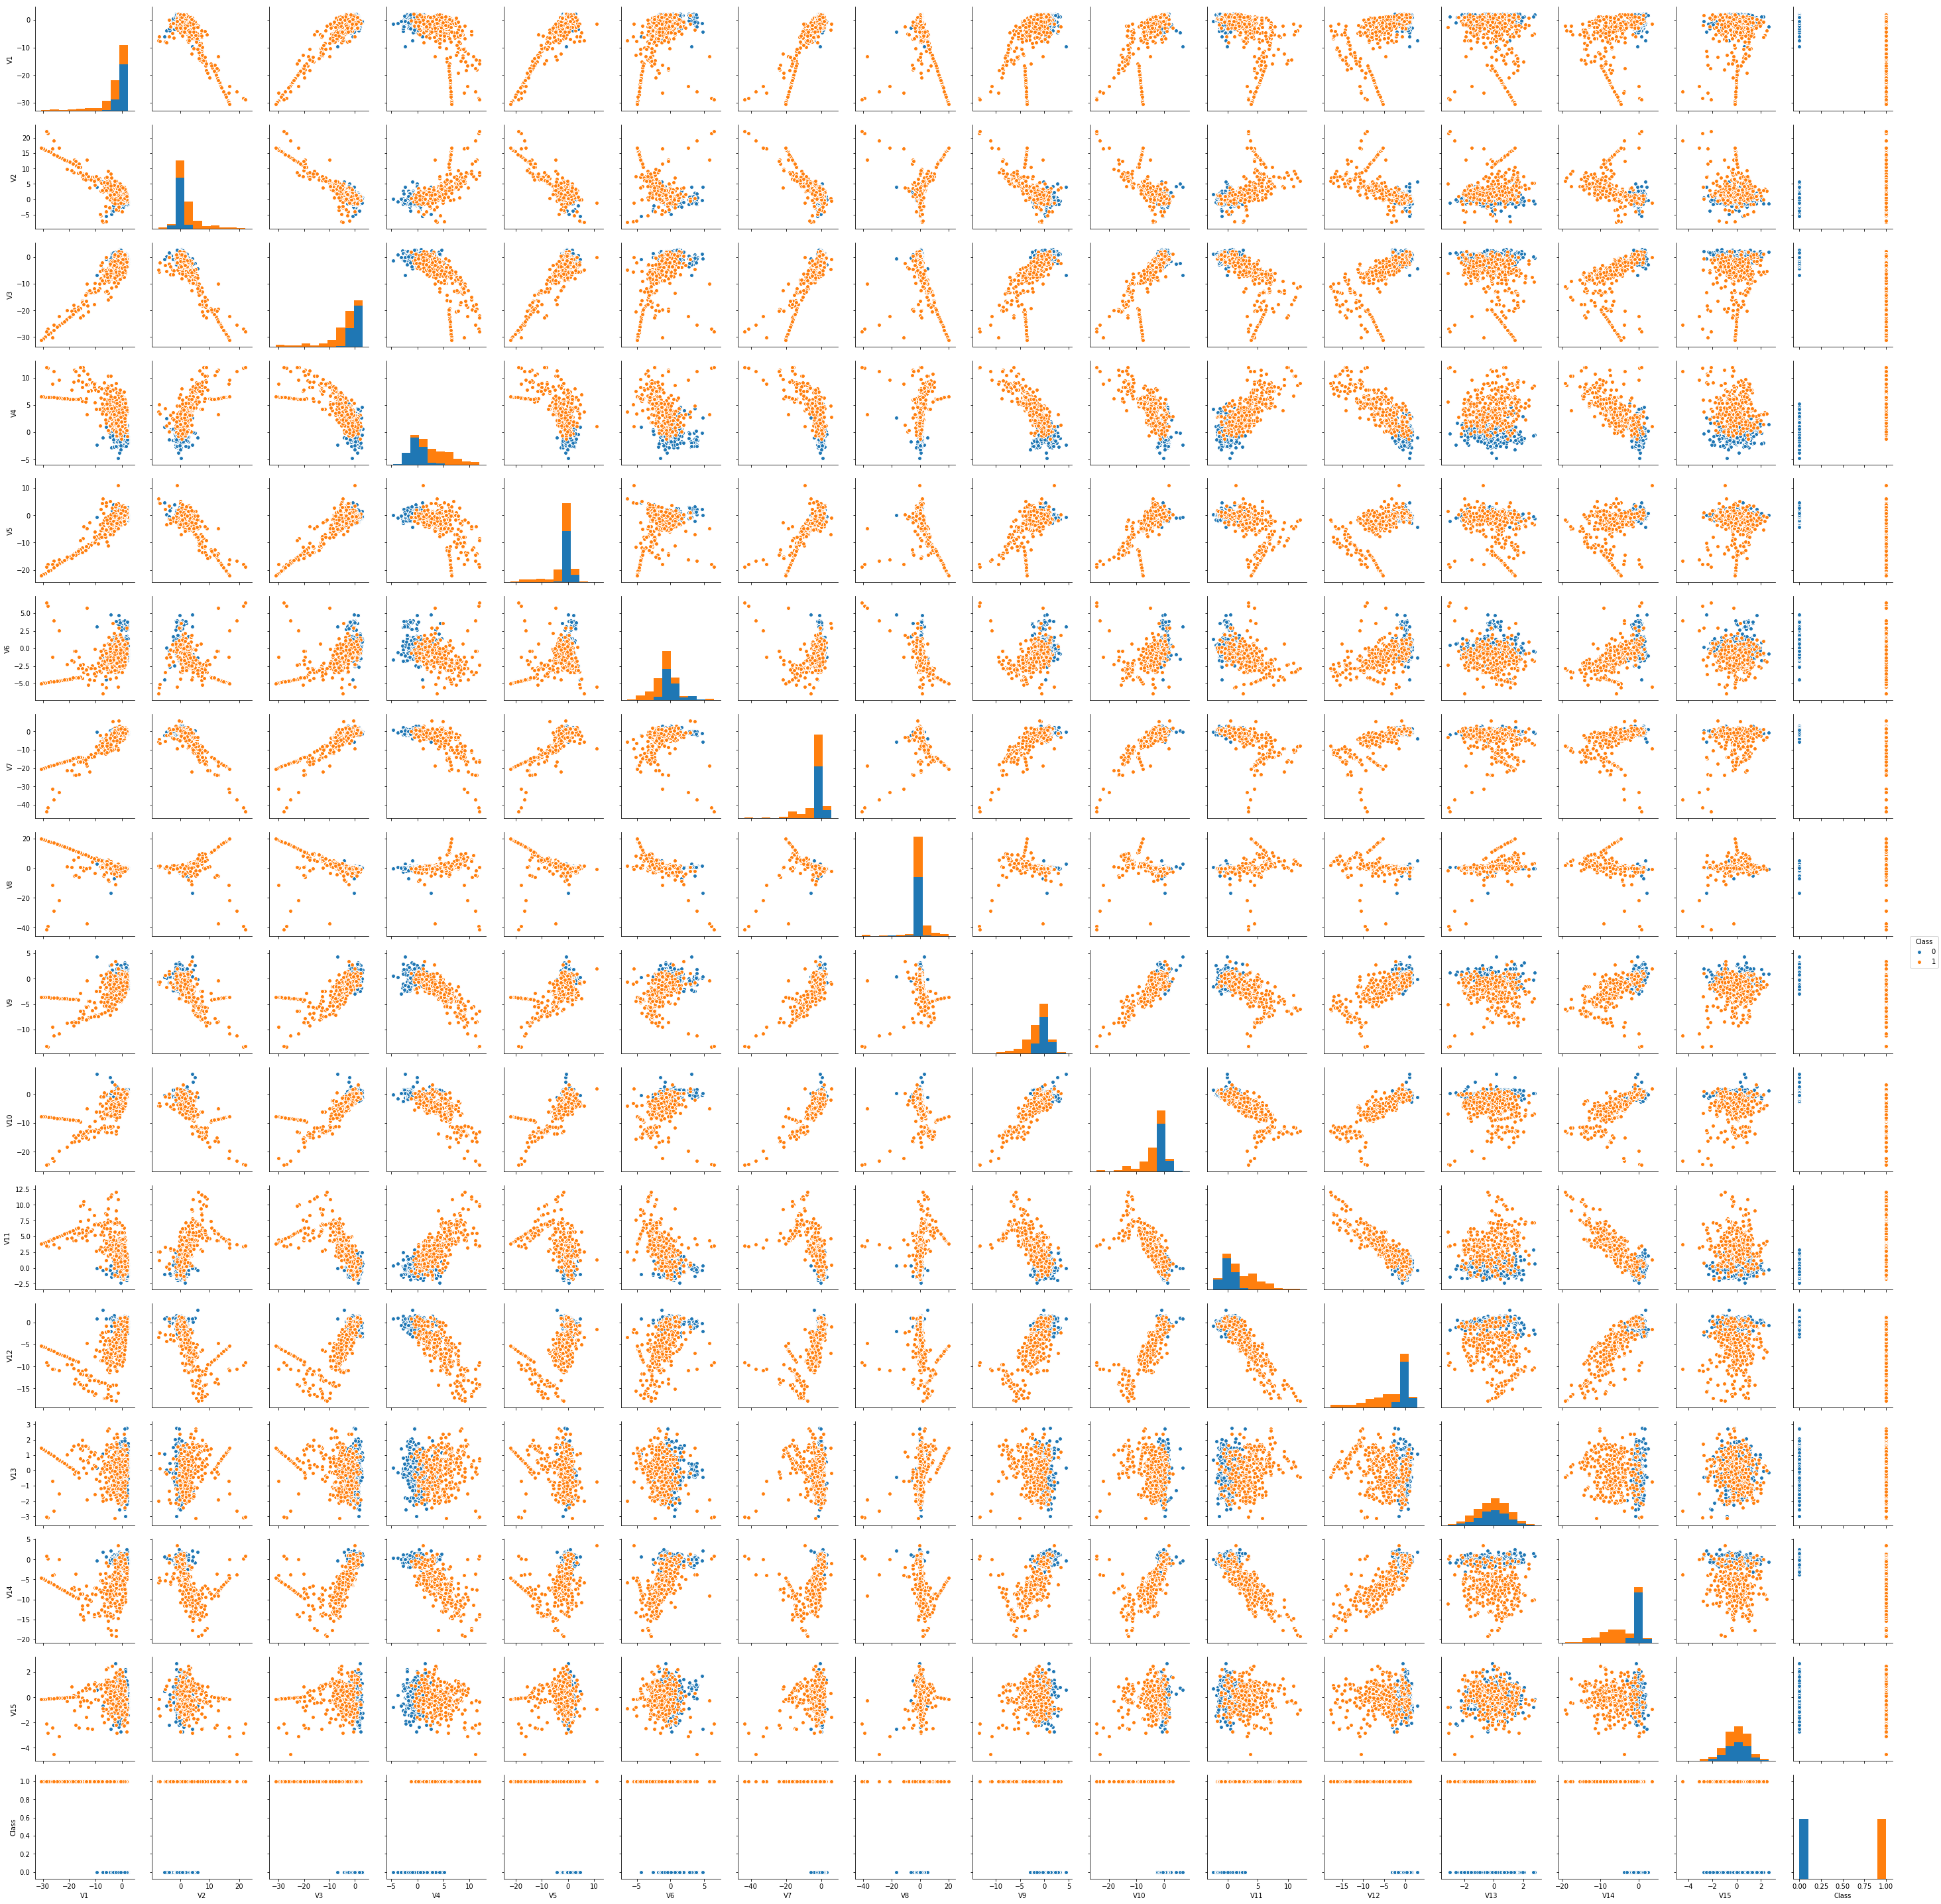

In [30]:
sns.pairplot(feature_set_1, hue = "Class");

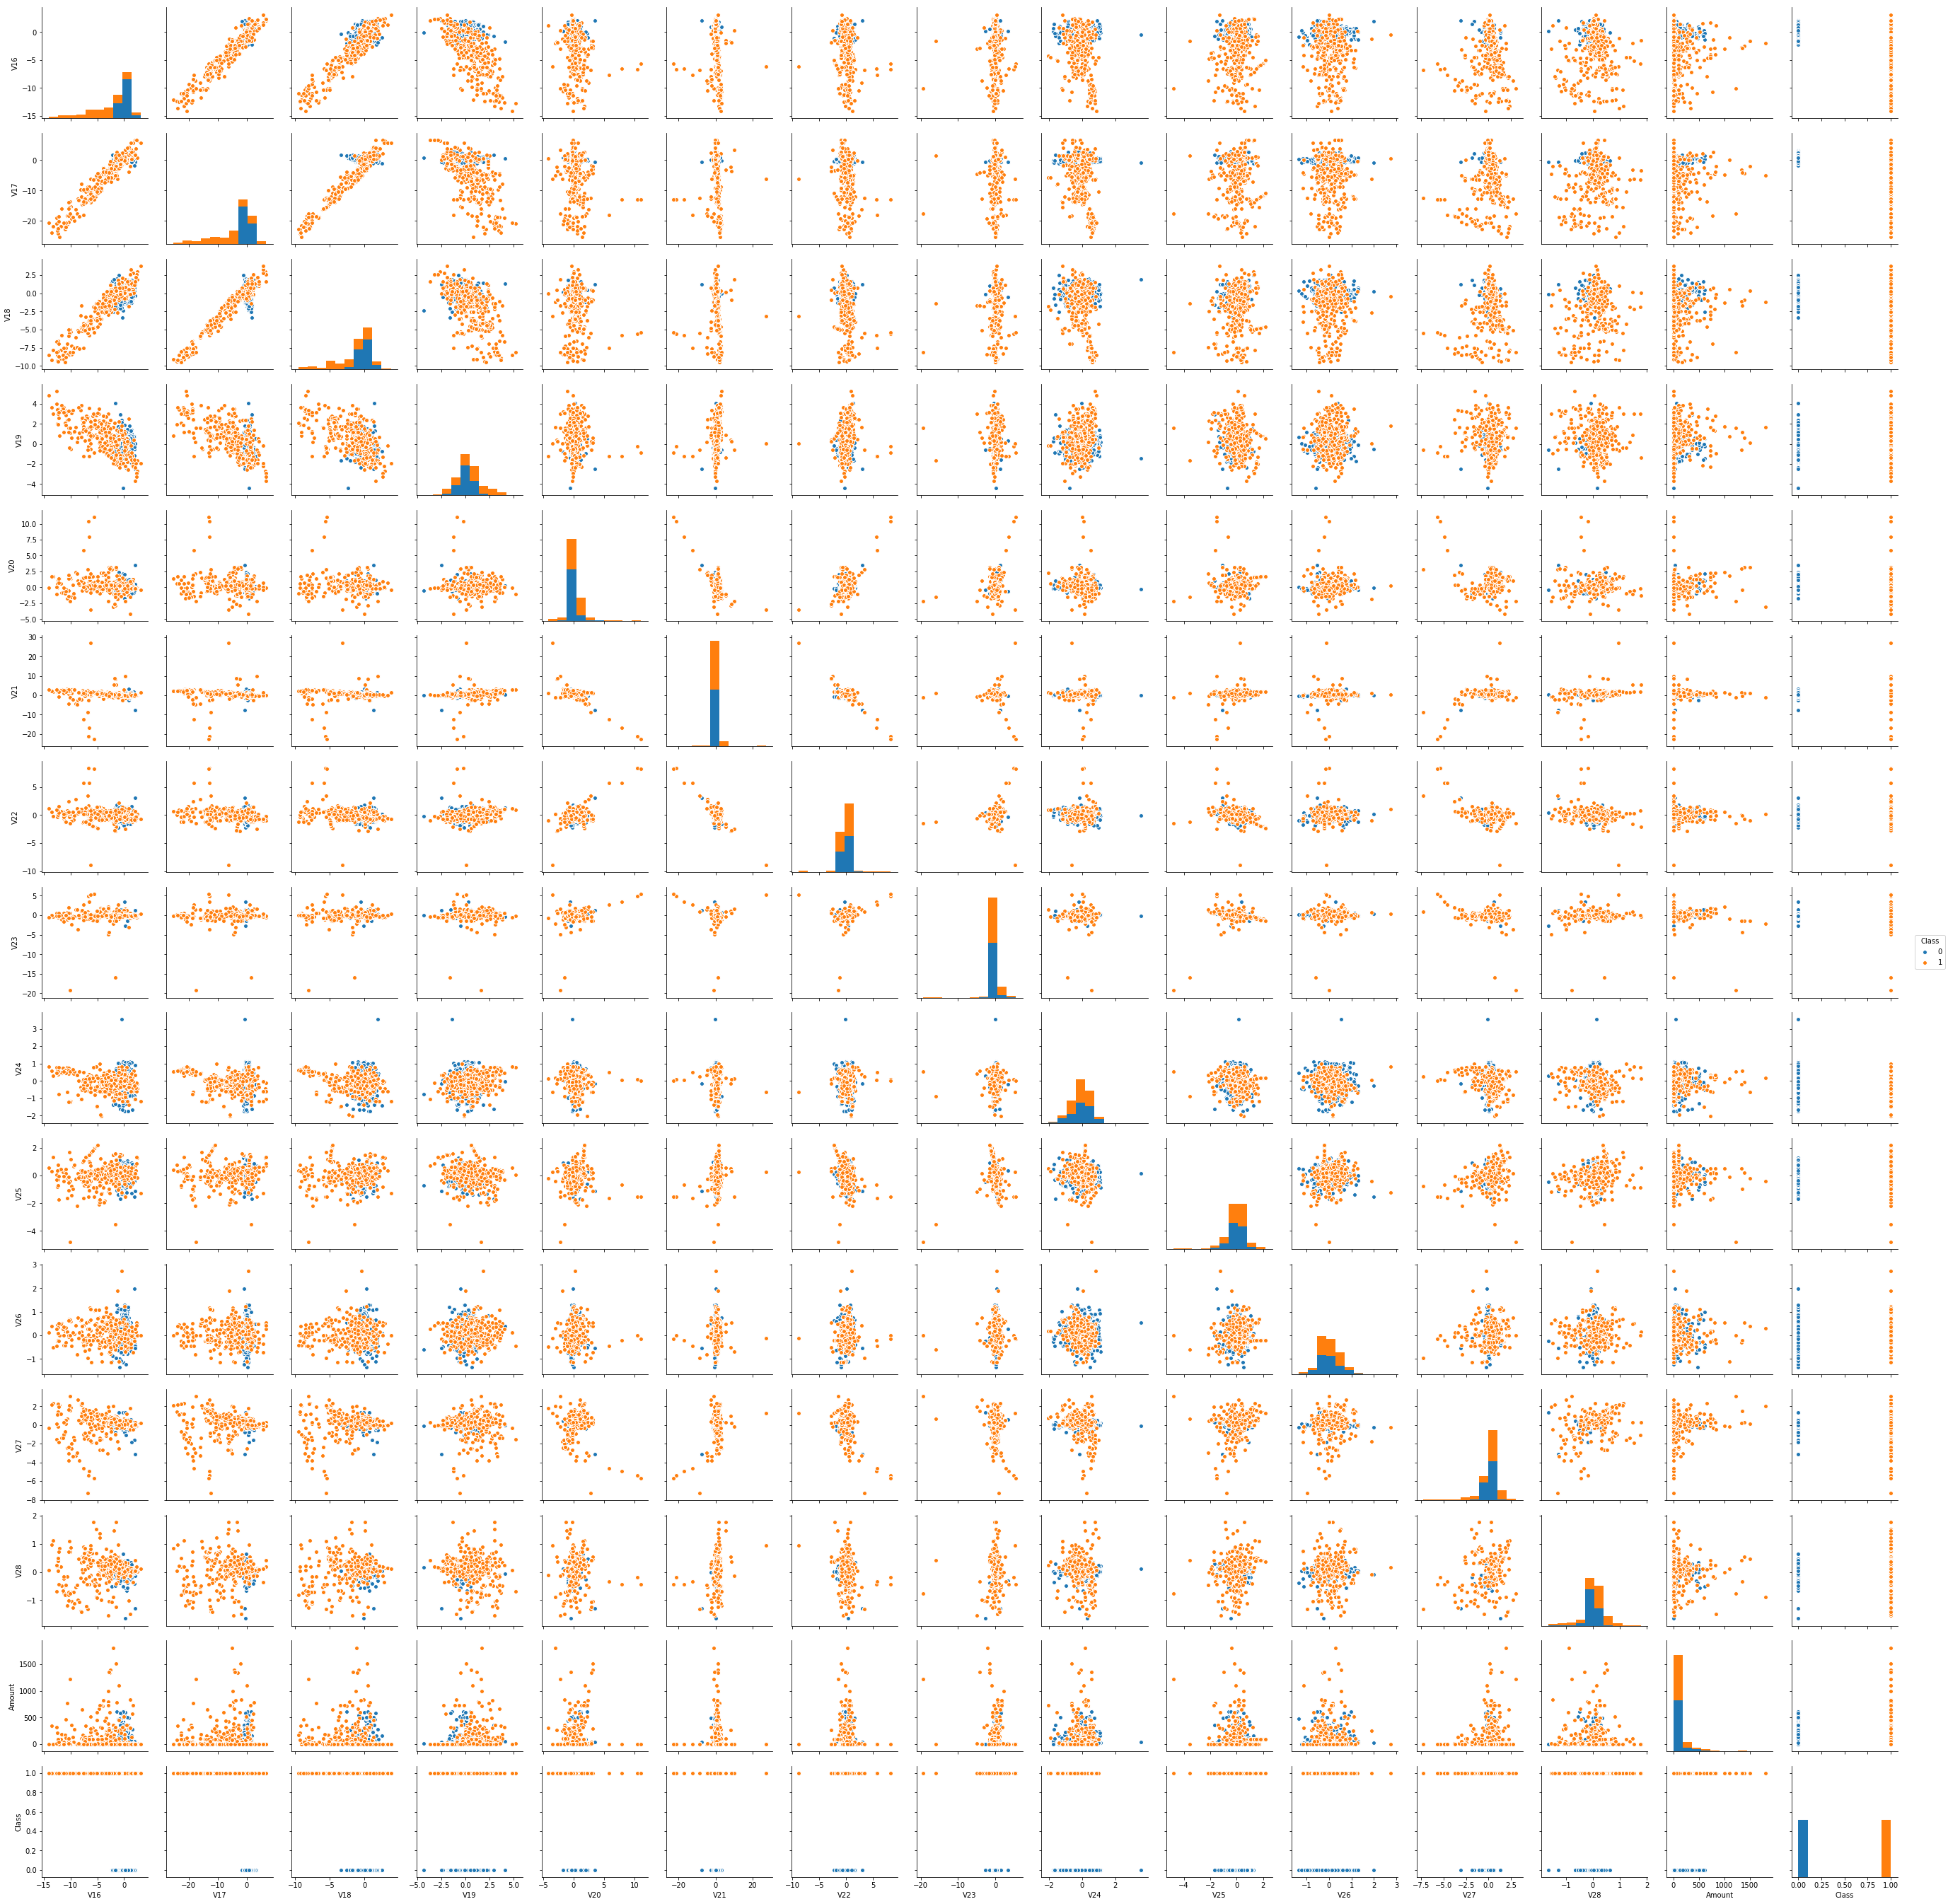

In [20]:
sns.pairplot(feature_set_2, hue = "Class");

It is obvious that the two classess can't seperate from one another, so logistic regression and random forest might be good choices for modeling. (SVC and Dicriminant Analysis both are better performed when the classes can be seperated from each other pretter well)

# Modeling

In [16]:
x_train_undersample = x_train.ix[undersample_indices, :]
y_train_undersample = y_train.ix[undersample_indices, :]

### 1. Logistic Classifier (L1 penalty) 

In [31]:
from sklearn.model_selection import GridSearchCV

In [44]:
from sklearn.linear_model import LogisticRegressionCV

In [59]:
logit = LogisticRegressionCV(penalty='l1', cv = 10, solver="liblinear")
logit = logit.fit(x_train_undersample, y_train_undersample.values.ravel())      
print "The best parameter C is",logit.C_[0]

The best parameter C is 0.35938136638


In [67]:
ceof_ = logit.coef_.tolist()[0]
feature_names = x_train_undersample.columns.values.tolist()
pd.DataFrame({
    "feature_name": feature_names,
    "values": ceof_
})

,feature_name,values
0,V1,-0.048743
1,V2,0.000000
2,V3,-0.059338
3,V4,0.663474
4,V5,0.153505
5,V6,-0.109547
6,V7,0.000000
7,V8,-0.255475
8,V9,0.000000
9,V10,-0.039813


### 2. Random Forest Classifier

In [75]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_jobs = -1, bootstrap = True, oob_score = True) 

param_grid = { 
    'n_estimators': [50, 100, 200, 500, 700],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy']
}

clf_rfc = GridSearchCV(rfc, param_grid=param_grid, cv= 5)
clf_rfc = clf_rfc.fit(x_train_undersample, y_train_undersample.values.ravel())

In [69]:
print 'The best parameters are', clf_rfc.best_params_

The best parameters are {'max_features': 'log2', 'n_estimators': 500, 'criterion': 'gini'}


### 4. Resampling + Model Selection

#### I will regenerate data from training data to make prediction with the . Then I will make a new undersampling training dataset for model selection.

In [81]:
from sklearn.metrics import precision_recall_curve, precision_score, roc_auc_score, roc_curve, confusion_matrix, auc, classification_report, recall_score

In [82]:
#normal_indices_complement = map(lambda x: (x in normal_indices) & (x not in random_normal_indices), normal_indices)
np.random.seed(370)
random_normal_indices_1 = np.random.choice(normal_indices, count_fraud, replace = False)
undersample_indices_1 = np.concatenate([fraud_indices,random_normal_indices_1])

In [85]:
x_train_undersample_1 = x_train.ix[undersample_indices_1, :]
y_train_undersample_1 = y_train.ix[undersample_indices_1, :]
#print type(y_train_undersample_1)

In [86]:
# predict with the default threshold 0.5

y_train_pred_logit = logit.predict(x_train_undersample_1.values)
y_train_pred_rfc = clf_rfc.predict(x_train_undersample_1.values)
#print type(y_train_pred_rfc)

#### use ROC with auc score and PR Curve to evaluate model performance.

In [87]:
import itertools
np.set_printoptions(precision=3)

In [88]:
"""
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues
                         ):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [89]:
# ROC CURVE
def plot_roc_curve(clf, x_train, y_train):
    
    y_pred_score = clf.predict_proba(x_train)[:,1]
    #print "y_pred_score: "
    #print(y_pred_score)
    #print "y_true: "
    #print(y_train.values.ravel())
    fpr, tpr, thresholds = roc_curve(y_train.values.ravel(), y_pred_score)
    roc_auc = auc(fpr,tpr)
    # Plot ROC
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b',label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.0])
    plt.ylim([-0.1,1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [90]:
# Precision Recall Curve
def plot_Precision_Recall_Curve(clf, x_train, y_train):
    
    probas_pred = clf.predict_proba(x_train)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_train.values.ravel(), probas_pred)
    #print 'Pricision: ', precision
    pr_auc = auc(recall, precision)
    # Plot Precision-Recall curve
    plt.plot(precision, recall, label='AUC = %0.2f'% pr_auc)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.03])
    plt.xlim([0.0, 1.03])
    plt.title('Precision-Recall example')
    plt.legend(loc="lower left")

In [91]:
cm_logit = confusion_matrix(y_train_undersample_1,y_train_pred_logit)
cm_rfc = confusion_matrix(y_train_undersample_1,y_train_pred_rfc)
classes_name = ['Legitimate', 'Fraud']

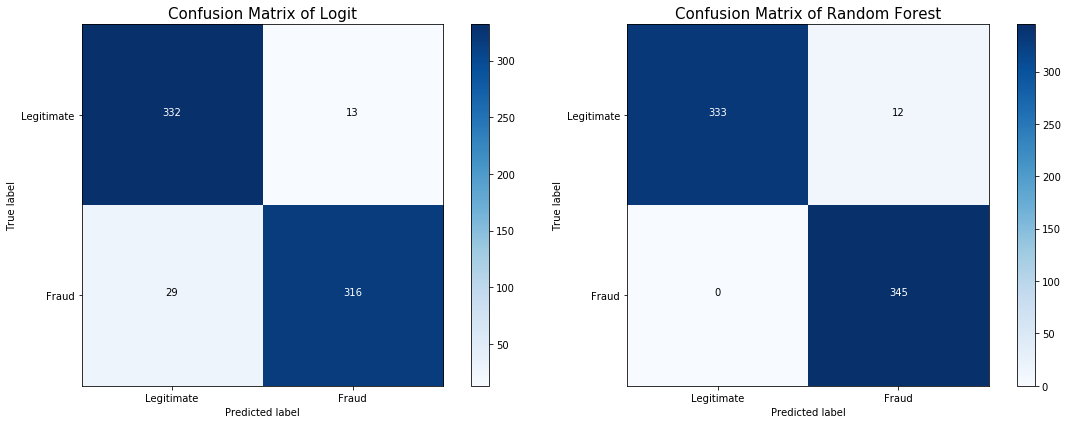

In [98]:
# with the default threshold 0.5, how do those three models work? show with the confusion matrix
figure = plt.figure(figsize=(16, 6))

ax = figure.add_subplot(1,2,1)
plot_confusion_matrix(cm_logit, classes_name)
plt.title("Confusion Matrix of Logit", fontsize = 15)


ax = figure.add_subplot(1,2,2)
plot_confusion_matrix(cm_rfc, classes_name)
plt.title("Confusion Matrix of Random Forest", fontsize = 15);

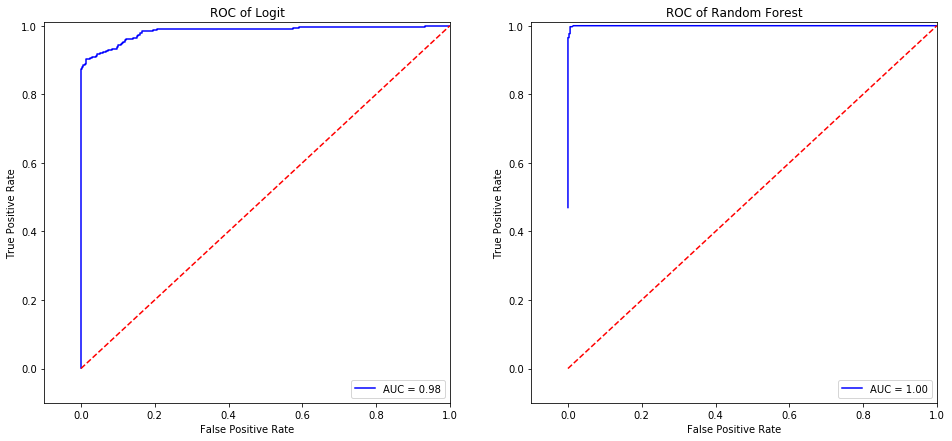

In [107]:
# ROC with AUC score
figure = plt.figure(figsize=(16,7))

ax = figure.add_subplot(1,2,1)
plot_roc_curve(clf_logit, x_train_undersample_1, y_train_undersample_1)
plt.title("ROC of Logit")

ax = figure.add_subplot(1,2,2)
plot_roc_curve(clf_rfc, x_train_undersample_1, y_train_undersample_1)
plt.title("ROC of Random Forest");

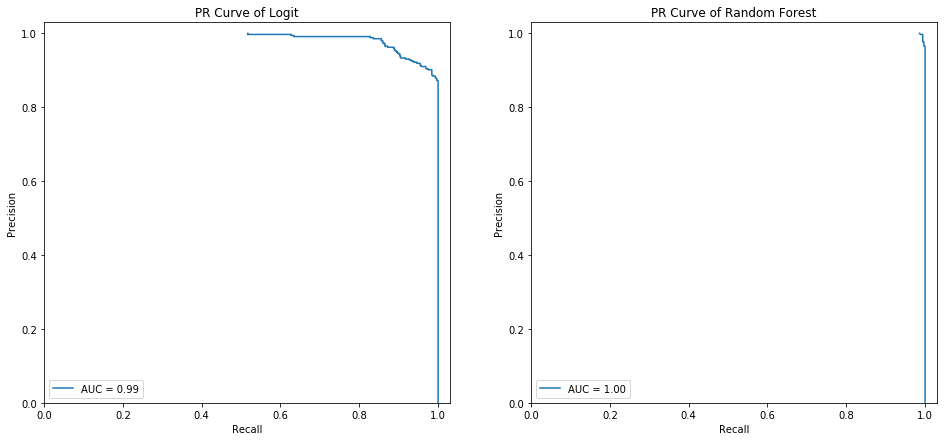

In [102]:
# Precison Recall curve with auc score

figure = plt.figure(figsize=(16,7))

ax = figure.add_subplot(1,2,1)
plot_Precision_Recall_Curve(clf_logit, x_train_undersample_1, y_train_undersample_1)
plt.title('PR Curve of Logit')

ax = figure.add_subplot(1,2,2)
plot_Precision_Recall_Curve(clf_rfc, x_train_undersample_1, y_train_undersample_1)
plt.title('PR Curve of Random Forest');

Conclusion:<br>
Random Forest gave an amazing performance! BUT it is NOT the end. In reality, financial institutes will pay financially when they misclassify the transactions, and the conventional model doesn't take this into consideration, so at this point I'd like to introduce a cost sentitive model to make classification -- Bayesian Risk Minimization Approach

# Cost Sensitive Classfier

## Background of cost sensitive models 

Either wrongly detect a fraudulent transaction or fail to detect a fraudulent transaction is costly. <br> Taking cost into consideration and thus choose a classifer that minimizes the total cost is optimal.

### Cost Matrix

1. (Fraud, Fraud): both the detected and true labels are "fraud", where financial institutes need a fixed number of cost to deal with this situation, let's say $C_a$.
2. (Legitimate, Fraud): FIs detect as normal but actually is a fraud, where the financial institute would lose the total numnber spent on this transaction. 
3. (Fraud, Legitimate): FIs detect as a Fraud but actually a normal one, where card holders would call the FIs to repay the order with 50% probability and give up the transaction with 50% probability. Actually there are intangible losses for FIs in this situation which is the satisfaction decline of the cusotmers, but at this point I just neglect it. 
4. (Legitimate, Legitimate): no cost.

|        | $Cost Matrix$|
| ------ | ------ | ------ |
|        |  True Label $$(t_i)$$ |     |
| Predicted Label $$(p_i)$$| Fraud (1)| Legitimate (0)|
| Fraud (1) | $$C_a$$ | $$0.5 Amt_i$$ |
| Legitimate (0)| $$Amt_i$$ | 0 |


### Cost Function

###  $$cost = \sum\limits_{i=1}^n t_i (p_i C_a + (1 - p_i) Amt_i) + (1 - t_i) (0.5 Amt_i)$$ 

## A threshold based approach
First I'd like to introduce the cost funciton to the Logisitc model and RF model I got above and to choose the optimal model and its corresponding threshold to minimize the total cost.

Suppose $C_a$ is 2 UDS.

In [111]:
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [113]:
def create_cost_df(model, x, y, thresholds):
    results = []
    Amount = x.Amount.tolist()
    for i in range(len(thresholds)):
        y_pred = model.predict_proba(x)[:,1] > thresholds[i]
        y_pred = 1*y_pred
    
        result_i = pd.DataFrame(
            {
                'Amt': Amount,
                't': y.Class.tolist(),
                'p': y_pred
            }
        )
        

        result_i["Ca"] = 2
        result_i["cost"] = result_i.t*(result_i.p*result_i.Ca + (1 - result_i.p)*result_i.Amt) + (1 - result_i.t)*result_i.Ca
        result_i["recall_score"] = recall_score(y, y_pred)
        result_i["precision_score"] = precision_score(y, y_pred)
        
        result_i = result_i.groupby(['recall_score','precision_score'])['cost'].mean().reset_index()
        result_i['threshold'] = thresholds[i]
        
        results.append(result_i)
    
    results = pd.concat(results, axis=0, ignore_index=True)
    return results

Logistic Reg.

In [114]:
cost_df_logit = create_cost_df(logit, x_train_undersample_1, y_train_undersample_1, thresholds)
cost_df_logit

,recall_score,precision_score,cost,threshold
0,0.991304,0.802817,2.082406,0.1
1,0.962319,0.897297,2.993101,0.2
2,0.936232,0.928161,4.445652,0.3
3,0.927536,0.952381,6.191406,0.4
4,0.915942,0.960486,6.820145,0.5
5,0.904348,0.971963,7.985812,0.6
6,0.898551,0.981013,7.986841,0.7
7,0.881159,0.990228,9.769203,0.8
8,0.872464,0.990132,9.942130,0.9


Random Forest Classifier

In [115]:
cost_df_rfc = create_cost_df(clf_rfc, x_train_undersample_1, y_train_undersample_1, thresholds)
cost_df_rfc

,recall_score,precision_score,cost,threshold
0,1.000000,0.727848,2.000000,0.1
1,1.000000,0.819477,2.000000,0.2
2,1.000000,0.903141,2.000000,0.3
3,1.000000,0.945205,2.000000,0.4
4,1.000000,0.966387,2.000000,0.5
5,0.997101,0.991354,2.003609,0.6
6,0.965217,0.997006,2.943377,0.7
7,0.915942,1.000000,7.511391,0.8
8,0.860870,1.000000,12.663058,0.9


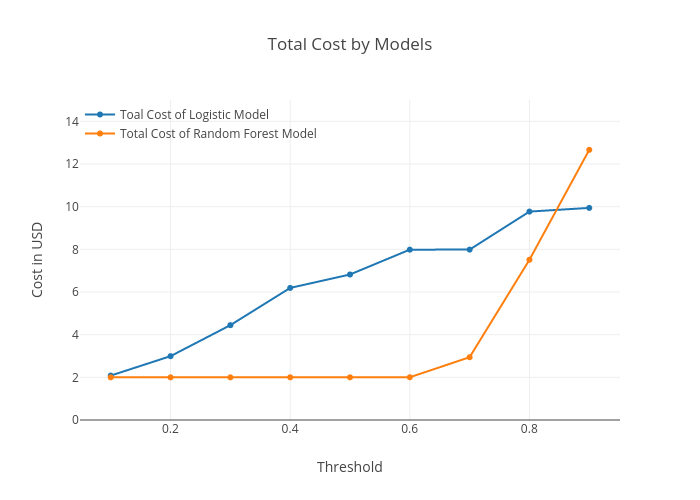

In [131]:
cost_bar_logit = go.Scatter(x=cost_df_logit.threshold,
                            y=cost_df_logit.cost,
                            name='Toal Cost of Logistic Model',
                            mode = "lines+markers"
                           )

cost_bar_rfc = go.Scatter(x=cost_df_rfc.threshold,
                          y=cost_df_rfc.cost,
                          name='Total Cost of Random Forest Model',
                          mode = "lines+markers"
                         )

layout = go.Layout(title='Total Cost by Models',
                    yaxis=dict(
                        title='Cost in USD',
                        showgrid = True,
                        range = [0,15]
                    ),
                    xaxis=dict(
                        title='Threshold'
                    ),
                    legend=dict(
                       x=0,
                       y=1,
                       bgcolor='rgba(255, 255, 255, 0)',
                       bordercolor='rgba(255, 255, 255, 0)'
                    )
                   )

data = [cost_bar_logit, cost_bar_rfc]

fig = go.Figure(data=data, layout=layout)
py.image.ishow(fig)

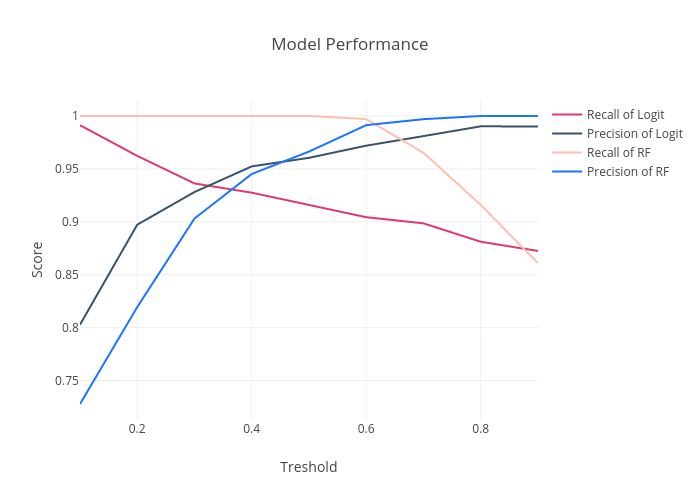

In [130]:
recall_logit = go.Scatter(x=cost_df_logit.threshold,
                          y=cost_df_logit.recall_score,
                          name='Recall of Logit',
                          mode = "lines",
                          marker = dict(
                              color = "#E1396C"
                          )
                         )

recall_rfc = go.Scatter(x=cost_df_rfc.threshold,
                        y=cost_df_rfc.recall_score,
                        name='Recall of RF',
                        mode="lines",
                        marker=dict(
                            color = "#FEBFB3"
                        )
                       )
    
precision_logit = go.Scatter(x=cost_df_logit.threshold,
                             y=cost_df_logit.precision_score,
                             name='Precision of Logit',
                             mode = "lines",
                             marker=dict(
                                 color = "rgb(55, 83, 109)"
                             )
                            )


precision_rfc = go.Scatter(x=cost_df_rfc.threshold,
                           y=cost_df_rfc.precision_score,
                           name='Precision of RF',
                           mode = "lines",
                           marker=dict(
                                 color = "rgb(26, 118, 255)"
                             )
                            )

layout = go.Layout(
    title='Model Performance',
    yaxis=dict(
        title='Score'
    ),
    xaxis=dict(
        title='Treshold'
    ),
    barmode = "group"
)
    

data = [recall_logit, precision_logit, recall_rfc, precision_rfc]

fig = go.Figure(data=data, layout=layout)

py.image.ishow(fig)

Conclusion:<br>
Combining the cost graph and model performance graph above, I can conclude that Random Forest model with threshold 0.5 is the optimal one, which can minizie the total cost while leave the model performance well.

## Bayesian Risk Minimization Classifer

Basic Idea:<br>
a decision model based on quantifying tradeoffs between various decisions using probabilities and the costs that accompany such decisions. 

$$R(p_f|X) = L(p_f|t_f) P(p_f|X) + L(p_f|t_l) P(p_l|X)$$

$$R(p_l|X) = L(p_l|t_f) P(p_f|X) + L(p_l|t_l) P(p_l|X)$$

Class as fraud if $$R(p_f|X) =< R(p_l|X)$$

Computing with the cost matrix above, we can rewrite the risk function as:

$$ R(p_f|X) = C_a P(p_f|X) + 1/2 Amt_i P(p_l|X)$$

$$R(p_l|X) = Amt_i P(p_f|X)$$

$$cost = \sum\limits_{i=1}^n t_i (p_i C_a + (1 - p_i) Amt_i) + (1 - t_i) (0.5 Amt_i)$$ 

Suppose $C_a$ to be 2 USD

In [132]:
def Create_Cost_DF(clf, x, y):
    prob_fraud = clf.predict_proba(x)[:,1]
    prob_legitimate = clf.predict_proba(x)[:,0]
    Amount = x.Amount.tolist()
    y_true = y.Class.tolist()
    
    
    cost_df = pd.DataFrame({
        "t": y_true,
        "prob_fraud": prob_fraud,
        "prob_legitimate": prob_legitimate,
        "Amount": Amount
    }
    )
    
    cost_df["Ca"] = 2
    cost_df["risk_fraud"] = cost_df.Ca*cost_df.prob_fraud + cost_df.Ca*cost_df.prob_legitimate
    cost_df["risk_legitimate"] = cost_df.Amount*cost_df.prob_fraud
    
    
    '''
    if risk of classifying as fraud is less than the risk of classifying as legitimate, 
    then classify as fraud. ie. p = 1
    '''
    for i in range(len(y)):
        if cost_df.risk_fraud[i] <= cost_df.risk_legitimate[i]:
            cost_df.ix[i,"p"] = 1
        else:
            cost_df.ix[i,"p"] = 0
    
    cost_df["cost"] = cost_df.t*(cost_df.p*cost_df.Ca + (1 - cost_df.p)*cost_df.Amount) + (1 - cost_df.t)*cost_df.Ca
    
    return cost_df

In [138]:
cost_logit = Create_Cost_DF(logit, x_train_undersample_1, y_train_undersample_1)

recall_logit = recall_score(cost_logit.t, cost_logit.p)
precision_logit = precision_score(cost_logit.t, cost_logit.p)
mean_cost_logit = cost_logit.cost.mean()

print "The recall of logit is %f" % (recall_logit)
print "--------------------------------"
print "The precision of logit is %f" % (precision_logit)
print "--------------------------------"
print "The cost of logit is %f" % (mean_cost_logit)

The recall of logit is 0.620290
--------------------------------
The precision of logit is 0.602817
--------------------------------
The cost of logit is 1.831768


In [139]:
cost_rfc = Create_Cost_DF(clf_rfc, x_train_undersample_1, y_train_undersample_1)

recall_rfc = recall_score(cost_rfc.t, cost_rfc.p)
precision_rfc = precision_score(cost_rfc.t, cost_rfc.p)
mean_cost_rfc = cost_rfc.cost.mean()

print "The recall of RF is %f" % (recall_rfc)
print "--------------------------------"
print "The precision of RF is %f" % (precision_rfc)
print "--------------------------------"
print "The cost of RF is %f" % (mean_cost_rfc)

The recall of RF is 0.628986
--------------------------------
The precision of RF is 0.586486
--------------------------------
The cost of RF is 1.782014


From the analysis result, I derive that the risk mimimization approach based on RF decreases the cost by 11% compared to the threshold based approach at an expense of the lower recall and precision.

## Prediction on test data

Finally, I am going to user the models to make predictions on the test data

Model 1: Random Forest with threshold 0.5

Recall is 0.918
Precision is 0.055
The cost is 2.027695


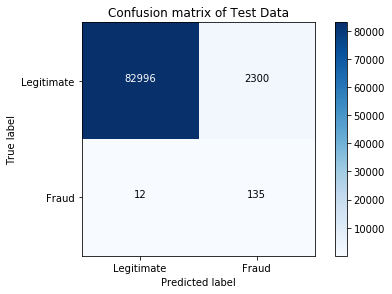

In [147]:
'''
The optimal model is rfc with threshold 0.5
'''

y_test_pred = clf_rfc.predict_proba(x_test)[:,1] > 0.5
y_test_pred = 1*y_test_pred

y_test_true = y_test
cm_test = confusion_matrix(y_test_true, y_test_pred)

classes_name = ['Legitimate', 'Fraud']

fig = plt.Figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
plot_confusion_matrix(cm_test, classes_name,
                          title='Confusion matrix of Test Data'
                         )

print "Recall is %.3f" % (float(cm_test.item(3))/(cm_test.item(3)+cm_test.item(2)))
print "Precision is %.3f" % (float(cm_test.item(3))/(cm_test.item(3)+cm_test.item(1)))

cost_test_df = create_cost_df(clf_rfc, x_test, y_test, thresholds)
print "The cost is %f" % (cost_test_df[cost_test_df.threshold == 0.5]["cost"])

Model 2: Random Forest Model with Risk Minimization Approach

Recall is 0.503
Precision is 0.002
The cost is 1.999273


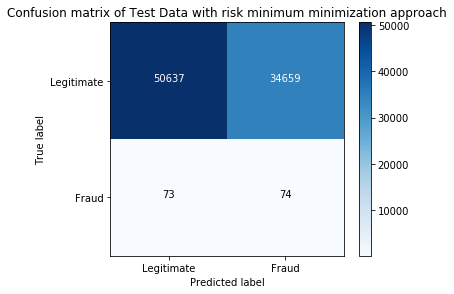

In [143]:
cost_rf_test = Create_Cost_DF(clf_rfc, x_test, y_test)
y_test_pred = cost_rf_test.p
y_test_true = y_test
cm_test_rf = confusion_matrix(y_test_true, y_test_pred)

classes_name = ['Legitimate', 'Fraud']

fig = plt.Figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
plot_confusion_matrix(cm_test_rf, 
                      classes_name,
                      title='Confusion matrix of Test Data with risk minimum minimization approach'
                     )

print "Recall is %.3f" % (float(cm_test_rf.item(3))/(cm_test_rf.item(3)+cm_test_rf.item(2)))
print "Precision is %.3f" % (float(cm_test_rf.item(3))/(cm_test_rf.item(3)+cm_test_rf.item(1)))
print "The cost is %f" % (cost_rf_test.cost.mean())

Takeaways:<br>
1. the precision is dramatically low compared to the training data. This is understandable because I downsampled the "normal" class for the better performance of machine learning models. This way models will overestimate the frequency of "fraudulent" transactions leading to a sharp decline in precision.
2. Though a lower recall and precision, risk minimization approach seems to have the lower cost than the threshold approach. But the cost estimation depends heavily on the modeling of cost matrix, whcih means the cost will change correspondingly if the cost matrix changes. 
<br>As a result it is really hard to say which model is better. From my perspective at this point, I prefer to model number 1 because it only has 1.5% higher cost than model 2 but increase recall and precision significantly in return. 